In [ ]:
import pandas as pandas
from matplotlib import pyplot as pyplot
from datetime import datetime, timedelta

# print python version
import sys
print(sys.version)

3.13.3 | packaged by conda-forge | (main, Apr 14 2025, 20:31:24) [MSC v.1943 64 bit (AMD64)]


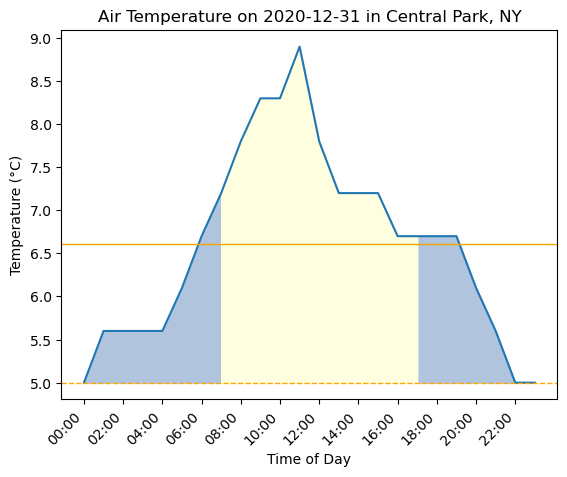

In [ ]:
# Measured air temperature in °C
# Central Park, New York, US 
# 2020-12-31, 00:00 - 23:00

start_time = datetime(2020, 12, 31)


air_temperature = [
    5.0, 5.6, 5.6, 5.6, 5.6, 6.1, 6.7, 7.2,
    7.8, 8.3, 8.3, 8.9, 7.8, 7.2, 7.2, 7.2,
    6.7, 6.7, 6.7, 6.7, 6.1, 5.6, 5.0, 5.0
] 

hours = [start_time + timedelta(hours=offset) for offset in range(len(air_temperature))]

displayed_hours = hours[::2]
display_labels = [hour.strftime('%H:%M') for hour in displayed_hours]

minimum = min(air_temperature)
average = sum(air_temperature) / len(air_temperature)

sunrise = 7
sunset = 17 

daytime_hours = hours[sunrise:sunset+1]

pyplot.plot(hours , air_temperature)

pyplot.title('Air Temperature on 2020-12-31 in Central Park, NY')
pyplot.xlabel('Time of Day')
pyplot.ylabel('Temperature (°C)')

pyplot.axhline(y=minimum, color='orange', linestyle='--', linewidth=1, label=f'Minimum: {minimum}°C')
pyplot.axhline(y=average, color='orange', linestyle='solid', linewidth=1, label=f'Average: {average:.1f}°C')

pyplot.fill_between(x=hours, y1=air_temperature, y2=minimum,  color='lightsteelblue')
pyplot.fill_between(x=daytime_hours, y1=air_temperature[sunrise:sunset+1], y2=minimum, color='lightyellow')


pyplot.xticks(displayed_hours, display_labels, rotation=45, horizontalalignment='right')
pyplot.show()

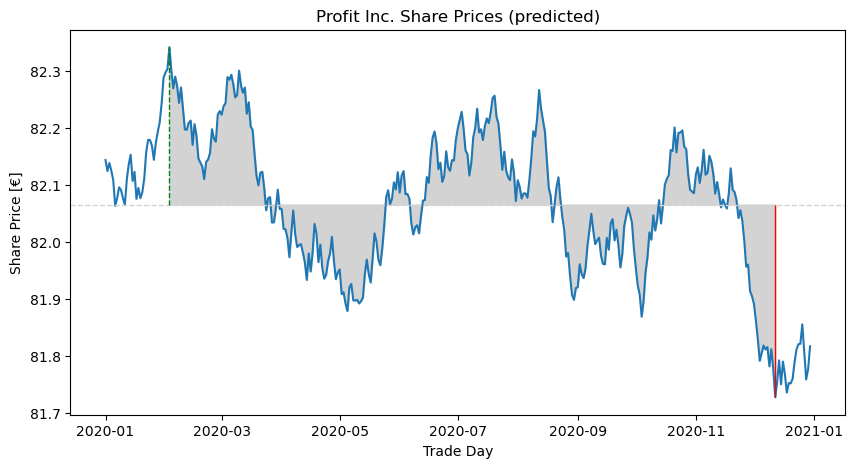

In [ ]:
from random import random
from datetime import datetime, timedelta


#----- Data generation -----
# Initial parameters
value_count = 365                 # How many days to predict
start_day = datetime(2020, 1, 1)  # Start day of the prediction
price = 50 * (1 + random())       # Initial share price

# Prediction data
share_prices = [
    price := price - 0.05 + random() / 10
    for _ in range(value_count)
]

# Dates assiciated with the data
days = [
    start_day + timedelta(days=current_value)
    for current_value in range(value_count)
]

avrg = sum(share_prices) / len(share_prices)
minimum = min(share_prices)
maximum = max(share_prices)

# ----- Do a simple plot of the share_prices over the days -----
pyplot.figure(figsize=(10, 5))
pyplot.plot(days, share_prices)

# ----- Consider that the minimum may occur either before or after the maximum -----

minimum_days = days[days.index(days[share_prices.index(minimum)]):days.index(days[share_prices.index(maximum)])+1]
maximum_days = days[days.index(days[share_prices.index(maximum)]):days.index(days[share_prices.index(minimum)])+1]

minimum_prices = share_prices[share_prices.index(minimum):share_prices.index(maximum)+1]
maximum_prices = share_prices[share_prices.index(maximum):share_prices.index(minimum)+1]

# ----- Add labels and a title to your plot -----

pyplot.xlabel('Trade Day')
pyplot.ylabel('Share Price [€]')
pyplot.title('Profit Inc. Share Prices (predicted)')

# ----- Find average value for the share_prices -----
pyplot.axhline(y=avrg, color='lightgrey', linestyle='--', linewidth=1, label=f'Average: {avrg:.2f}€')

# ----- Find the minimum and maximum share prices and the days on which they occur -----

pyplot.vlines(x=days[share_prices.index(minimum)], ymin=avrg, ymax=minimum, color='red', linestyle='solid', linewidth=1, label=f'Minimum: {minimum:.2f}€')
pyplot.vlines(x=days[share_prices.index(maximum)], ymin=avrg, ymax=maximum, color='green', linestyle='dashed', linewidth=1, label=f'Maximum: {maximum:.2f}€')

# Fill in the area between the share price curve and the average line, between the minimum and maximum share price day
pyplot.fill_between(x=minimum_days, y1=minimum_prices, y2=avrg, color='lightgrey')
pyplot.fill_between(x=maximum_days, y1=maximum_prices, y2=avrg, color='lightgrey')


Maximum coffee consumption: 24 cups by Oliver

Price per cup to break even: 0.21€

Missing persons on the balance sheet: ['Norman']


Christian     5.75
David        -2.95
Fredo       -12.20
Julia        22.05
Lokamani      4.20
Nina         -1.30
Norman       -0.35
Oliver       41.60
Tobias        4.85
Uwe           2.40
Name: Balance after substraction, dtype: float64

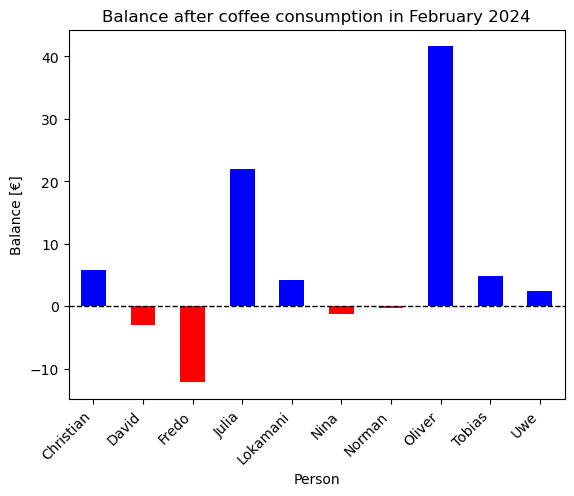

In [ ]:
import pandas
from matplotlib import pyplot

# Coffee consumption - February 2024
coffee_consumption = {
    "Christian": 10,
    "David": 17,
    "Fredo": 22,
    "Julia": 2,
    "Lokamani": 18,
    "Nina": 3,
    "Norman": 1,
    "Oliver": 24,
    "Tobias": 14,
    "Uwe": 6
}

# Account balance end of 2024-01
balance = {
    "Christian": 9.25,
    "David": 3.00,
    "Fredo": -4.50,
    "Julia": 22.75,
    "Lokamani": 10.50,
    "Nina": -0.25,
    "Oliver": 50.00,
    "Tobias": 9.75,
    "Uwe": 4.50
}

# Turn the dictionary into a pandas-Series
coffee_series = pandas.Series(coffee_consumption)

# Assign the Series with the name Coffee 2024-02
coffee_series.name = 'Coffee 2024-02'

# Find out who is drinking the most coffee and how much
max_coffee = coffee_series.max()
max_drinker = coffee_series.idxmax()

print(f'Maximum coffee consumption: {max_coffee} cups by {max_drinker}\n')

# Oliver paid 24,98€ in this month to buy coffee beans. Calculate the minimal price per cup that is required to break even.
total_cost = 24.98
price_per_cup = total_cost / coffee_series.sum()

print(f'Price per cup to break even: {price_per_cup.round(2)}€\n')

# Generate a new one containing the outstanding debt
real_price_per_cup = 0.35
debt_series = coffee_series * real_price_per_cup
debt_series.name = 'Debt 2024-02'

# Turn the balance (i.e. how much money they currently have on their account) into a series as well
balance_series = pandas.Series(balance)
balance_series.name = 'Balance 2024-01'

# Subtract the debt from the balance
new_balance_series = balance_series - debt_series
new_balance_series.name = 'Balance after substraction'

# Add an initial balance of 0,00€ for the missing person on the balance sheet before calculating the final balance
# get the the missing persons
missing_persons = coffee_series.index.difference(balance_series.index)
print(f'Missing persons on the balance sheet: {list(missing_persons)}')
# add them to the balance series with a value of 0.00
for person in missing_persons:
    balance_series[person] = 0.00

# Recalculate the new balance
new_balance_series = balance_series - debt_series
new_balance_series.name = 'Balance after substraction'

#round for a better vewing
new_balance_series = new_balance_series.round(2)

display(new_balance_series)

# make a nice plot for the broadband to the brain ;D
new_balance_series.plot(kind='bar', color=['red' if value < 0 else 'blue' for value in new_balance_series])

pyplot.title('Balance after coffee consumption in February 2024')
pyplot.ylabel('Balance [€]')
pyplot.xlabel('Person')
pyplot.axhline(y=0, color='black', linestyle='--', linewidth=1)
pyplot.xticks(rotation=45, horizontalalignment='right')
pyplot.show()



In [4]:
#labels.py

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


DATE_TIME_COLUMNS = [
    YEAR := "Year",
    MONTH := "Month",
    DAY := "Day",
    HOUR := "Hour"
]

MEASUREMENT_COLUMNS = [
    AIR_TEMP := "Air Temperature [°C]",
    DEW_POINT := "Dew Point [°C]",
    PRESSURE := "Sea Level Pressure [HPa]",
    WIND_DIRECTION := "Wind Direction [°]",
    WIND_SPEED := "Wind Speed [m/s]",
    SKY_CONDITION := "Sky Condition & Coverage Code",
    PRECIPITATION_1H := "Precipitation (1h) [mm]",
    PRECIPITATION_6H := "Precipitation (6h) [mm]"
]

# The column we create to use as an index
INDEX_COLUMN = "Date & Time"

DERIVED_COLUMNS = [
    TRACE_PRECIP_1H := "Trace precipitation (1h)",
    TRACE_PRECIP_6H := "Trace Precipitation (6h)"
]

# The columns that have been scaled by a factor of 10
# in the ISD Lite format
SCALED_COLUMNS = [
    AIR_TEMP, DEW_POINT, PRESSURE, WIND_SPEED,
    PRECIPITATION_1H, PRECIPITATION_6H
]






In [7]:
from pandas import read_csv, to_datetime, DataFrame
from pathlib import Path
from math import nan


def prepare_data(data_file: Path) -> DataFrame:
    """ Load a file containing weather data and make it ready to use.

        The file might be compressed but is expected to hold data
        in the ISDLite format. The contained data will be labelled and cleaned,
        so it is ready to use. Labels are taken from the `label`-module

        Args:
            data_file: A path to an exisiting data file that is to be loaded

        Returns:
            A fully labelled and cleaned pandas data frame
    """

    # Loading the data
    # No header in data file, use one or more whitespaces as column separator
    weather_data = read_csv(data_file, header=None, sep=r"\s+")

    # Set the proper column labels
    # IMPORTANT: this only works so nicely
    # because the columns are provided in the correct order!
    weather_data.columns = DATE_TIME_COLUMNS + MEASUREMENT_COLUMNS

    # Combine the date and time columns into one, correctly parsing date and time
    weather_data[INDEX_COLUMN] = to_datetime(
        weather_data[DATE_TIME_COLUMNS]
    )

    weather_data = weather_data.set_index(INDEX_COLUMN)

    # We don't need the separate date and time columns anymore
    weather_data = weather_data.drop(DATE_TIME_COLUMNS, axis="columns")

    # Replace the missing value indicator -9999 by nan
    weather_data = weather_data.replace({-9999: nan})

    # Filter and Extract the trace precipitation
    for original_column, new_column in [
        (PRECIPITATION_1H, TRACE_PRECIP_1H),
        (PRECIPITATION_6H, TRACE_PRECIP_6H)
    ]:
        filter_traces = weather_data[original_column] == -1
        weather_data[new_column] = filter_traces
        weather_data.loc[filter_traces, original_column] = nan

    # make the wind direction col up to stardards
    no_wind_filter = weather_data[WIND_DIRECTION] == 0
    weather_data.loc[no_wind_filter, WIND_DIRECTION] = nan

    north_wind_filter = weather_data[WIND_DIRECTION] == 360
    weather_data.loc[north_wind_filter, WIND_DIRECTION] = 0


    # Undo the column scaling
    weather_data[SCALED_COLUMNS] = weather_data[SCALED_COLUMNS] / 10

    return weather_data



Perfect days: 20
Not sure days: 255
Too cold days: 2326
Too hot days: 462
Rain days: 344


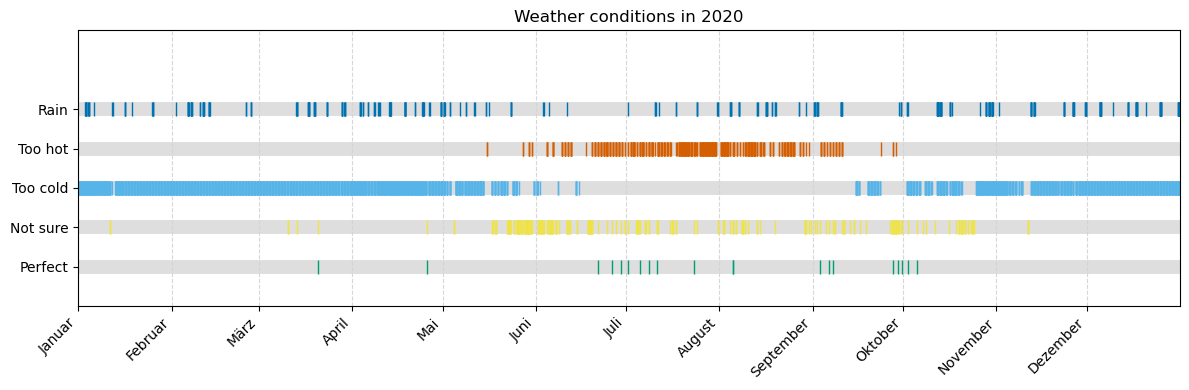

In [57]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---- data ----
data_path = Path(r'n:\isipd\projects\p_planetdw\data\methods_test\s2_outputs\725053-94728-2020.gz')
data = prepare_data(data_path)  # assumes your prepare_data + constants defined/imported


# ---- filtering ----
def get_best_moment(df: pd.DataFrame, case: str) -> pd.DataFrame:
    """
    Find timestamps where:
      15°C ≤ air temperature ≤ 25°C
      precip = 0 mm (or NaN, if 'no rain' was normalized to NaN)
      0 m/s < wind speed ≤ 2 m/s
      sky in {2,3,4}
      time of day: 08:00–18:00
    """
    # if "no rain" is NaN in your preprocessed data, allow NaN *or* 0:
    pr_ok = df[PRECIPITATION_1H].isna() | df[PRECIPITATION_1H].eq(0)

    if case == 'perfect':
        mask = (
            df[AIR_TEMP].between(15, 25, inclusive='both')
            & pr_ok
            & df[WIND_SPEED].gt(0) & df[WIND_SPEED].le(2)
            & df[SKY_CONDITION].isin([2, 3, 4])
        )

    elif case == 'not sure':
        # allow unknown wind speed or sky condition as "maybe"
        mask = (
            df[AIR_TEMP].between(15, 25, inclusive='both')
            & pr_ok
            & ( (df[WIND_SPEED].gt(0) & df[WIND_SPEED].le(2)) | df[WIND_SPEED].isna() )
            & ( df[SKY_CONDITION].isin([2, 3, 4]) | df[SKY_CONDITION].isna() )
        )

    elif case == 'too cold':
        mask = df[AIR_TEMP].le(15)

    elif case == 'too hot':
        mask = df[AIR_TEMP].ge(25)

    elif case == 'rain':
        mask = df[PRECIPITATION_1H].gt(0)

    else:
        raise ValueError(f"Unknown case: {case!r}")

    return df.loc[mask].between_time('08:00', '18:00')


# ---- timeline plotting ----
def _plot_timeline(dates, y_offset=0, color='blue'): 
    plt.axhline(y=y_offset, color='lightgrey', linestyle='solid', linewidth=10, alpha=0.75) 
    plt.plot(dates, [y_offset] * len(dates), '|', markersize=10, color=color) 





# ---- run it ----
perfect_days   = get_best_moment(data, 'perfect')
not_sure_days  = get_best_moment(data, 'not sure')
too_cold_days  = get_best_moment(data, 'too cold')
too_hot_days   = get_best_moment(data, 'too hot')
rain_days      = get_best_moment(data, 'rain')

print(f'Perfect days: {len(perfect_days)}')
print(f'Not sure days: {len(not_sure_days)}')
print(f'Too cold days: {len(too_cold_days)}')
print(f'Too hot days: {len(too_hot_days)}')
print(f'Rain days: {len(rain_days)}')

cases = {
    'Perfect': perfect_days,
    'Not sure': not_sure_days,
    'Too cold': too_cold_days,
    'Too hot': too_hot_days,
    'Rain': rain_days
}

def plot_timeline_at_year(year: int, cases):
    # number of timelines
    num_cases = len(cases)

    # start/end of the year
    start = pd.Timestamp(f'{year}-01-01 00:00')
    end   = pd.Timestamp(f'{year}-12-31 23:59')

    # month starts for x-axis ticks
    date_range = pd.date_range(start=start, end=end, freq='MS')

    # wide figure
    plt.figure(figsize=(12, num_cases-1))
    ax = plt.gca()

    # plot timelines using your helper; collect y ticks/labels
    y_offsets = []
    y_labels = []
    colors = ['#009E73', '#F0E442', '#56B4E9', '#D55E00', '#0072B2']

    for y_offset, (label, df) in enumerate(cases.items(), start=0):
        # restrict to the selected year
        df_year = df.loc[(df.index >= start) & (df.index <= end)]

        color = colors[y_offset % len(colors)]

        # your helper draws the baseline + tick marks
        _plot_timeline(df_year.index, y_offset=y_offset, color=color)

        y_offsets.append(y_offset)
        y_labels.append(label)

    # y-axis ticks/labels
    ax.set_yticks(y_offsets)
    ax.set_yticklabels(y_labels)

    # y-limits padding
    ax.set_ylim(-1, num_cases + 1)

    # x-limits for the year
    ax.set_xlim(start, end)

    # x-ticks at month starts, labeled as month names
    ax.set_xticks(date_range)
    ax.set_xticklabels([ts.strftime('%B') for ts in date_range], rotation=45, ha='right')

    # grid only on x-axis
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # tidy layout
    plt.title(f'Weather conditions in {year}')
    plt.tight_layout()

    plt.show()



for year in range(2020, 2021):
    plot_timeline_at_year(year, cases)





In [ ]:
import numpy as np


orig = prepare_data(data_path) 

# ensure required columns are present
required = [DEW_POINT, AIR_TEMP]


df = orig[required].astype(float).copy()

#remove nans
df = df.dropna(subset=required)

def vapor_pressure(temp_c):
    """Vectorized Magnus-type vapor pressure (hPa). Accepts scalar, array-like, Series."""
    t = np.asarray(temp_c, dtype=np.float64)
    # use a stable Magnus formulation with exp()
    return 6.1094 * np.exp(17.625 * t / (243.04 + t))

def relative_humidity(dew_point_c, air_temp_c):
    e_s = vapor_pressure(air_temp_c)
    e_a = vapor_pressure(dew_point_c)
    # avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        rh = (e_a / e_s) * 100.0
    return np.clip(rh, 0.0, 100.0)

def wet_bulb_temperature(dew_point_c, air_temp_c, pressure_hpa: float = 1013.25):
    """Vectorized Stull approximation for wet-bulb temperature (°C)."""
    rh = relative_humidity(dew_point_c, air_temp_c)
    t = np.asarray(air_temp_c, dtype=np.float64)
    # use numpy ufuncs for elementwise computation
    t_wb = (
        t * np.arctan(0.151977 * np.sqrt(rh + 8.313659))
        + np.arctan(t + rh)
        - np.arctan(rh - 1.676331)
        + 0.00391838 * (rh ** 1.5) * np.arctan(0.023101 * rh)
        - 4.686035
    )
    return t_wb


def get_snow_conditions(df: pd.DataFrame) -> pd.DataFrame:
    
    """
    add colum hat indicates the snow nodnitions:

    lookup:
    x > 28 	no snow possible
    28 ≥ x ≥ 27 	wet snow, snowy rain
    27 > x ≥ 23 	marginal snow
    23 > x ≥ 20 	decent snow
    20 > x ≥ 18 	good snow
    18 > x 	great snow
    """

    df['Wet Bulb Temp [°F]'] = df['Wet Bulb Temperature [°C]'] * 9/5 + 32

    df['Snow Conditions'] = pd.cut(
        df['Wet Bulb Temp [°F]'],
        bins=[-np.inf, 18, 20, 23, 27, 28, np.inf],
        labels=[
            'great snow',
            'good snow',
            'decent snow',
            'marginal snow',
            'wet snow, snowy rain',
            'no snow possible'
        ],
        right=False
    )

    return df

# compute and attach columns to the original dataframe
df['Actual Vapor Pressure [hPa]'] = vapor_pressure(df[DEW_POINT].values)
df['Saturation Vapor Pressure [hPa]'] = vapor_pressure(df[AIR_TEMP].values)
df['Relative Humidity [%]'] = relative_humidity(df[DEW_POINT].values, df[AIR_TEMP].values)
df['Wet Bulb Temperature [°C]'] = wet_bulb_temperature(df[DEW_POINT].values, df[AIR_TEMP].values)

# print all days wher snow was possible (bulb temp > 28°F)
snow_days = get_snow_conditions(df)
snow_days = snow_days[snow_days['Snow Conditions'] != 'no snow possible']
display(snow_days['Snow Conditions'])


# Combine the possible snow quality of a day with the precipitation data to find likely days where some actual snowfall could be observed
snow_days_with_precip = snow_days[~orig[PRECIPITATION_1H].isna() & (orig[PRECIPITATION_1H] > 0)]
print(f" We found {len(snow_days)} timestamps with snow possible conditions, of which {len(snow_days_with_precip)} also had some precipitation recorded.")

date_list = snow_days_with_precip.index()

Date & Time
2020-01-02 05:00:00    wet snow, snowy rain
2020-01-02 06:00:00    wet snow, snowy rain
2020-01-08 22:00:00    wet snow, snowy rain
2020-01-08 23:00:00           marginal snow
2020-01-09 00:00:00           marginal snow
                               ...         
2020-12-30 13:00:00           marginal snow
2020-12-30 14:00:00           marginal snow
2020-12-30 15:00:00    wet snow, snowy rain
2020-12-30 17:00:00    wet snow, snowy rain
2020-12-30 18:00:00    wet snow, snowy rain
Name: Snow Conditions, Length: 620, dtype: category
Categories (6, object): ['great snow' < 'good snow' < 'decent snow' < 'marginal snow' < 'wet snow, snowy rain' < 'no snow possible']

 We found 620 timestamps with snow possible conditions, of which 23 also had some precipitation recorded.


C:\Users\castad001\AppData\Local\Temp\ipykernel_18280\651823305.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  snow_days_with_precip = snow_days[~orig[PRECIPITATION_1H].isna() & (orig[PRECIPITATION_1H] > 0)]


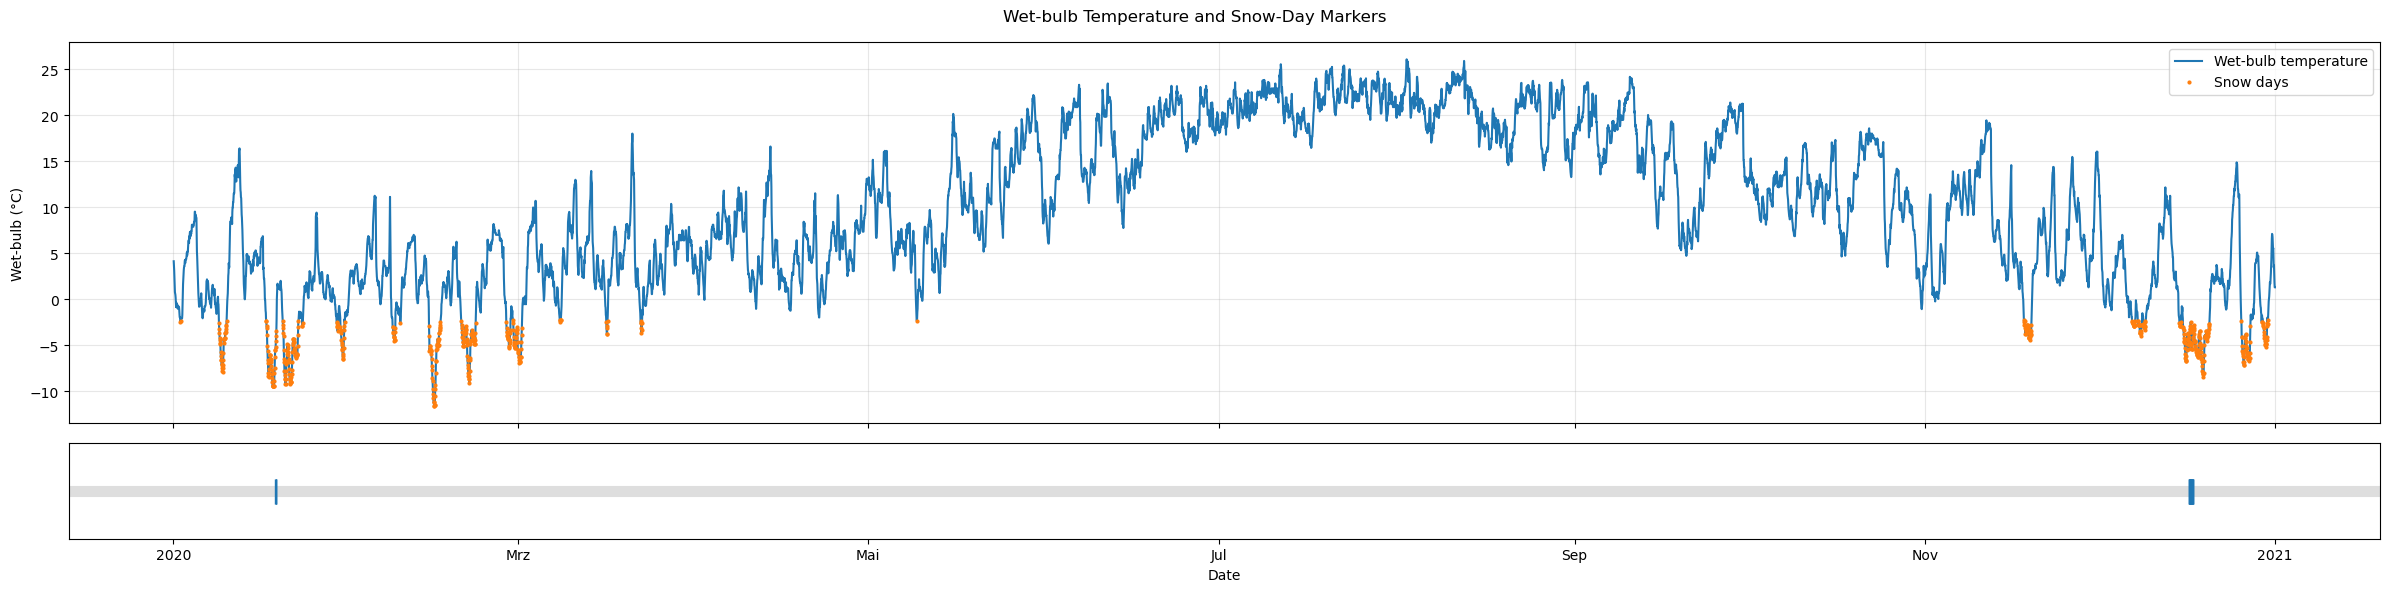

In [110]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Prep date formatting ---
locator  = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, axes = plt.subplots(
    nrows=2, sharex=True, figsize=(24, 6),
    gridspec_kw={'height_ratios': [4, 1]}
)

# ----- Top: timeline -----
ax0 = axes[0]
ax0.plot(df.index, df['Wet Bulb Temperature [°C]'], label='Wet-bulb temperature')
# scatter overlay for snow days (points only)
ax0.plot(snow_days.index, snow_days['Wet Bulb Temperature [°C]'],
         linestyle='none', marker='.', markersize=4, label='Snow days')

ax0.set_ylabel('Wet-bulb (°C)')
ax0.grid(True, alpha=0.3)
ax0.legend(loc='upper right')

# ----- Bottom: event markers (snow days with precip) -----
ax1 = axes[1]
ax1.axhline(0, color='lightgrey', linewidth=8, alpha=0.75)

# draw date markers at y=0
ax1.plot(date_list, [0]*len(date_list), '|', markersize=18)

ax1.set_ylim(-0.5, 0.5)
ax1.set_yticks([])
ax1.set_xlabel('Date')

# ----- Shared x: date formatting -----
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

fig.suptitle('Wet-bulb Temperature and Snow-Day Markers', y=0.98)
fig.tight_layout()
